In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pysindy as ps
from scipy.integrate import odeint
from math import pi
from pysindy.differentiation import FiniteDifference
fd = FiniteDifference(order=2, d=1)
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import glob
from sklearn.metrics import mean_absolute_error

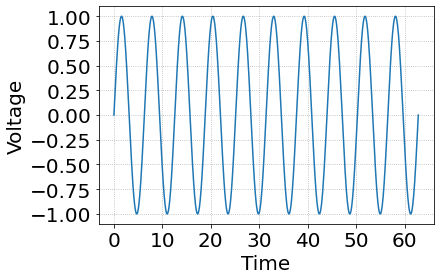

In [2]:
plt.grid(linestyle='dotted')
t = np.linspace(0,20*pi,1000)
x = np.sin(t)
plt.plot(t, x)
plt.xlabel('Time', fontsize = 20)
plt.ylabel('Voltage', fontsize = 20)
#plt.legend(['Actual function' , 'Learned function', 'Training Data'], prop={'size': 16})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig("Pics/slide6_input.png", dpi = 1000, bbox_inches='tight')

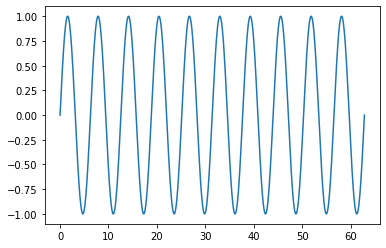

In [3]:
plt.plot(t,x)

In [4]:
dx = fd._differentiate(x, t)

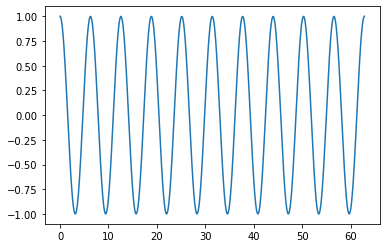

In [5]:
plt.plot(t,dx)

In [6]:
mdx = np.abs(dx)

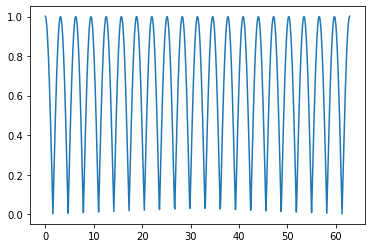

In [7]:
plt.plot(t, mdx)

In [8]:
def model(y, t):
    dydt = np.cos(t) - 0.5*np.abs(np.cos(t))*y - 2*np.cos(t)*np.abs(y)
    return dydt

In [9]:
y0 = 0
y = odeint(model, y0, t)

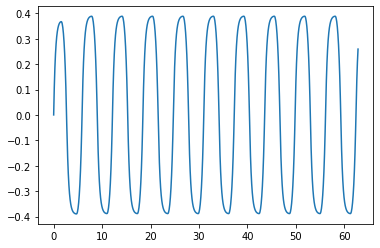

In [10]:
plt.plot(t,y)

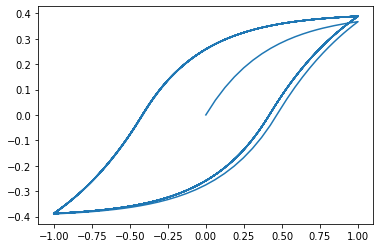

In [11]:
plt.plot(x, y)

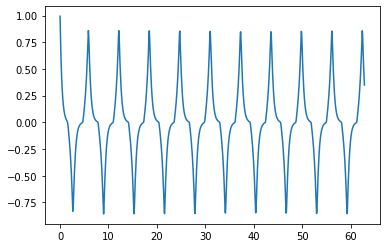

In [12]:
dy = fd._differentiate(y, t)
plt.plot(t, dy)

In [13]:
my = np.abs(y)
my = my.reshape(-1,)

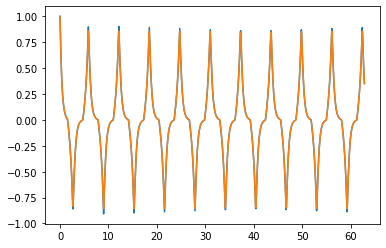

In [14]:
y = y.reshape(-1,)
dy = dy.reshape(-1,)
t1 = dx
t2 = mdx*y
t3 = dx*my
terms = t1-0.5*t2-2*t3
plt.plot(t,terms)
plt.plot(t, dy)

In [15]:
X = np.stack((y, x, dx, mdx, my), axis=-1)

In [16]:
model = ps.SINDy()
model.fit(X,t)
model.print()

(x0)' = 0.995 x2 + -0.504 x0 x3 + -1.976 x2 x4
(x1)' = 1.000 x2
(x2)' = -0.999 x1
(x3)' = -28.140 1 + -11.123 x0 + 6.165 x1 + 0.812 x2 + 2.588 x3 + -18.397 x0^2 + 46.289 x0 x1 + 21.125 x0 x2 + 5.670 x0 x3 + -3.769 x0 x4 + 15.579 x1^2 + -11.812 x1 x2 + -2.016 x1 x3 + -3.309 x1 x4 + 11.637 x2^2 + 1.338 x2 x3 + -1.860 x2 x4 + 11.637 x3^2 + -2.882 x3 x4 + -18.397 x4^2
(x4)' = -9.989 1 + -15.155 x0 + 5.047 x1 + -1.021 x2 + 12.813 x3 + 27.450 x4 + 0.105 x0^2 + -0.383 x0 x1 + 1.083 x0 x2 + 15.074 x0 x3 + -15.962 x0 x4 + -0.702 x1^2 + -0.857 x1 x2 + -5.133 x1 x3 + 8.249 x1 x4 + -1.155 x2^2 + 1.365 x2 x3 + 2.905 x2 x4 + -1.155 x3^2 + -28.803 x3 x4 + 0.105 x4^2


In [17]:
c1 = 0.995
c2 = -0.504
c3 = -1.976
def test_model(y, t):
    dydt = c1*np.cos(t) + c2*np.abs(np.cos(t))*y + c3*np.cos(t)*np.abs(y)
    return dydt

In [18]:
ytest_0 = 0
y_test = odeint(test_model, ytest_0, t)

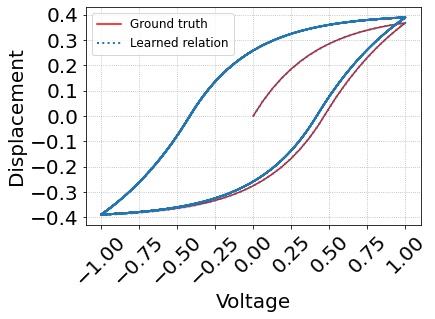

In [19]:
plt.grid(linestyle='dotted')
plt.plot(x, y, 'r')
plt.plot(x, y_test, linewidth=2, linestyle=':')
plt.xlabel('Voltage', fontsize = 20)
plt.ylabel('Displacement', fontsize = 20)
plt.legend(['Ground truth' , 'Learned relation'], loc='upper left', prop={'size': 12})
plt.xticks(fontsize=20, rotation='45')
plt.yticks(fontsize=20)
plt.savefig("Pics/Slide6_loop.png", dpi=1000,bbox_inches='tight')

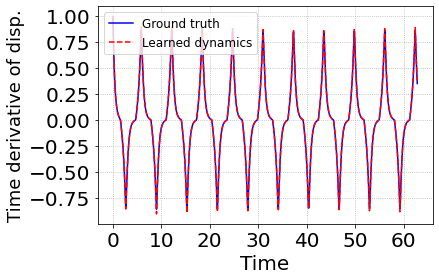

In [20]:
test = c1*t1+c2*t2+c3*t3
plt.plot(t,dy, 'b')
plt.plot(t,test, '--r')
plt.grid(linestyle='dotted')
plt.xlabel('Time', fontsize = 20)
plt.ylabel('Time derivative of disp.', fontsize = 18)
plt.legend(['Ground truth' , 'Learned dynamics'], prop={'size': 12})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig("Pics/slide6_deriv.jpg", dpi = 1000, bbox_inches='tight')

In [21]:
y = y.reshape(-1,1)
# Compute the relative L2 error norm (generalization error)
relative_error_test = np.mean((y_test - y)**2)/np.mean(y**2)
print("Relative Error Test: ", relative_error_test*100, "%")

Relative Error Test:  0.00028065442965404474 %


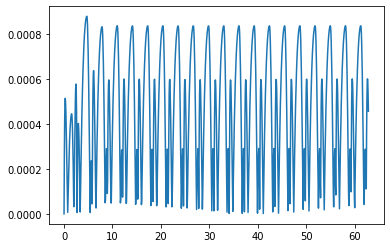

In [22]:
err_t = np.abs(y-y_test)
plt.plot(t, err_t)

In [23]:
x.shape

(1000,)

In [24]:
xx = x[::5]
xx.shape

(200,)